Vader: 
*   This uses a "bag of words" approach:
*   Stop words are removed
*   Each word is scored and combined to a total score.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk
nltk.download('vader_lexicon')

# Read in the data
df = pd.read_csv('/Users/willjohnston/Documents/GitHub/Covid-and-Reddit/VaderRobertaSentimentComparison/Datasets/PreCovidAnxietyRedditData.csv')
df = df.reset_index().rename(columns={'index': 'ID'})

print(df.shape)
df = df.head(500)
print(df.shape)

df.head()

(227, 9)
(227, 9)


[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


,ID,subReddit,Title,Content,Top Comment,upvotes,Number of comments,date,uniquePostID
0,0,Anxiety,Today I promised myself bacon and eggs if I co...,NaN,Good for you! Whenever I see something with an...,6044,98,2019-03-15 01:55:17,b18zmk
1,1,Anxiety,"Professor here, if you have missed class, plea...","Hello, I’ve read a lot of posts recently about...","Just as an ironic heads-up, I stay up at night...",5206,131,2019-02-20 06:39:13,asl2gr
2,2,Anxiety,"Have my first real, adult, job interview today...",NaN,Fuck yeah! You got this and you're going to ro...,5149,115,2019-02-26 16:08:35,av1397
3,3,Anxiety,Message from your future self,NaN,I really needed to see this today. Thank you.,4747,59,2019-03-19 17:40:14,b30dr2
4,4,Anxiety,1. Anxiety makes it hard to go to sleep 2. Dep...,Just one of the hellish cycles that anxiety ge...,Meeeeeeee. I keep promising myself to switch o...,4608,111,2019-09-16 21:07:27,d56opw


In [2]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [3]:
# Run the polarity score on the entire dataset
resTitle = {}
resContent = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    title = str(row['Title'])
    content = str(row['Content'])
    
    resTitle[i] = sia.polarity_scores(title)
    resContent[i] = sia.polarity_scores(content)

  0%|          | 0/227 [00:00<?, ?it/s]

In [4]:
vadersTitle = pd.DataFrame(resTitle).T
vadersTitle = vadersTitle.reset_index().rename(columns={'index': 'ID'})
vadersTitle = vadersTitle.merge(df, on='ID', how='left')
vadersTitle.head()

,ID,neg,neu,pos,compound,subReddit,Title,Content,Top Comment,upvotes,Number of comments,date,uniquePostID
0,0,0.049,0.739,0.211,0.7633,Anxiety,Today I promised myself bacon and eggs if I co...,NaN,Good for you! Whenever I see something with an...,6044,98,2019-03-15 01:55:17,b18zmk
1,1,0.274,0.609,0.117,-0.4767,Anxiety,"Professor here, if you have missed class, plea...","Hello, I’ve read a lot of posts recently about...","Just as an ironic heads-up, I stay up at night...",5206,131,2019-02-20 06:39:13,asl2gr
2,2,0.000,1.000,0.000,0.0000,Anxiety,"Have my first real, adult, job interview today...",NaN,Fuck yeah! You got this and you're going to ro...,5149,115,2019-02-26 16:08:35,av1397
3,3,0.000,1.000,0.000,0.0000,Anxiety,Message from your future self,NaN,I really needed to see this today. Thank you.,4747,59,2019-03-19 17:40:14,b30dr2
4,4,0.327,0.605,0.068,-0.8074,Anxiety,1. Anxiety makes it hard to go to sleep 2. Dep...,Just one of the hellish cycles that anxiety ge...,Meeeeeeee. I keep promising myself to switch o...,4608,111,2019-09-16 21:07:27,d56opw


In [5]:
vadersContent = pd.DataFrame(resContent).T
vadersContent = vadersContent.reset_index().rename(columns={'index': 'ID'})
vadersContent = vadersContent.merge(df, on='ID', how='left')
vadersContent.head()

,ID,neg,neu,pos,compound,subReddit,Title,Content,Top Comment,upvotes,Number of comments,date,uniquePostID
0,0,0.000,1.000,0.000,0.0000,Anxiety,Today I promised myself bacon and eggs if I co...,NaN,Good for you! Whenever I see something with an...,6044,98,2019-03-15 01:55:17,b18zmk
1,1,0.091,0.717,0.192,0.9376,Anxiety,"Professor here, if you have missed class, plea...","Hello, I’ve read a lot of posts recently about...","Just as an ironic heads-up, I stay up at night...",5206,131,2019-02-20 06:39:13,asl2gr
2,2,0.000,1.000,0.000,0.0000,Anxiety,"Have my first real, adult, job interview today...",NaN,Fuck yeah! You got this and you're going to ro...,5149,115,2019-02-26 16:08:35,av1397
3,3,0.000,1.000,0.000,0.0000,Anxiety,Message from your future self,NaN,I really needed to see this today. Thank you.,4747,59,2019-03-19 17:40:14,b30dr2
4,4,0.296,0.704,0.000,-0.7096,Anxiety,1. Anxiety makes it hard to go to sleep 2. Dep...,Just one of the hellish cycles that anxiety ge...,Meeeeeeee. I keep promising myself to switch o...,4608,111,2019-09-16 21:07:27,d56opw


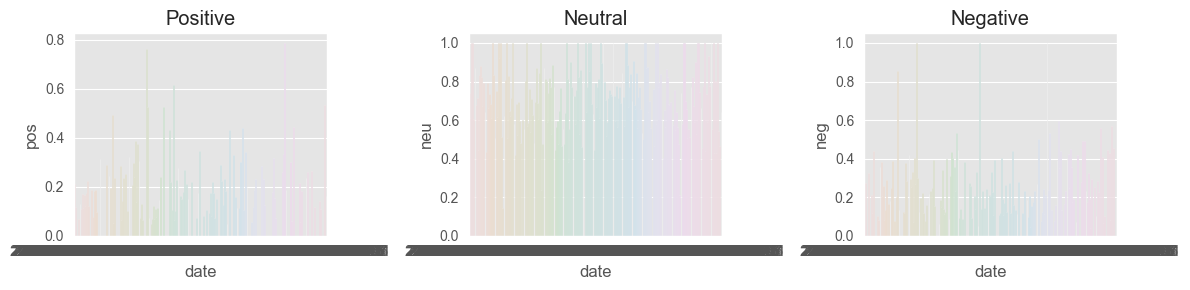

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vadersTitle, x='date', y='pos', ax=axs[0])
sns.barplot(data=vadersTitle, x='date', y='neu', ax=axs[1])
sns.barplot(data=vadersTitle, x='date', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

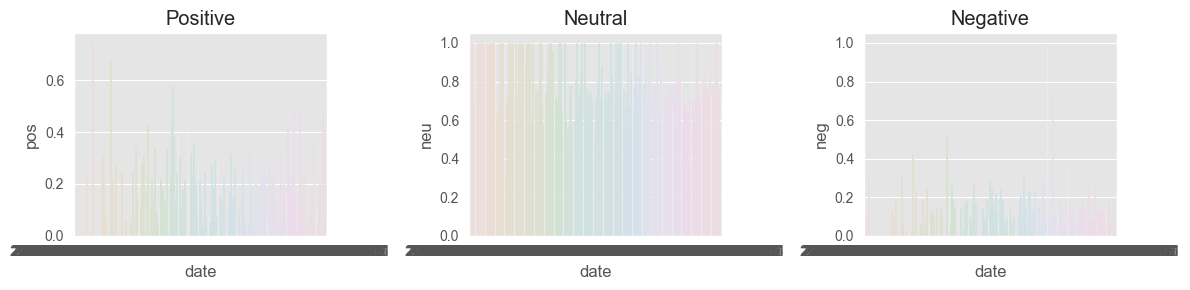

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vadersContent, x='date', y='pos', ax=axs[0])
sns.barplot(data=vadersContent, x='date', y='neu', ax=axs[1])
sns.barplot(data=vadersContent, x='date', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

Huggingface Roberta Transformers: https://huggingface.co/docs/transformers/model_doc/roberta

Roberta Pretrained Model:
*   A model trained from a large corpus of data.
*   Transformer model accounts for the words but also the context related to other words.



In [8]:
!pip install transformers

In [9]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [10]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [11]:
# Run for Roberta Model
robertaTitle = {}
robertaContent = {}
resTitle = {}
resContent = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        title = str(row['Title'])

        vader_title_result = sia.polarity_scores(title)
        vader_title_result_rename = {}

        for key, value in vader_title_result.items():
            vader_title_result_rename[f"vader_{key}"] = value
            
        roberta_title_result = polarity_scores_roberta(title)
        robertaTitle[i] = roberta_title_result
        resTitle[i] = {**vader_title_result_rename, **roberta_title_result}

    except RuntimeError:
        print(f'Broke for Title id {i}')

    try:
        content = str(row['Content'])

        vader_content_result = sia.polarity_scores(content)
        vader_content_result_rename = {}

        for key, value in vader_content_result.items():
            vader_content_result_rename[f"vader_{key}"] = value
            
        roberta_content_result = polarity_scores_roberta(content)
        robertaContent[i] = roberta_content_result
        resContent[i] = {**vader_content_result_rename, **roberta_content_result}

    except RuntimeError:
        print(f'Broke for Content id {i}')

  0%|          | 0/227 [00:00<?, ?it/s]

Broke for Content id 81
Broke for Content id 113
Broke for Content id 125
Broke for Content id 141
Broke for Content id 163
Broke for Content id 178
Broke for Content id 194


In [12]:
robertaTitleDF = pd.DataFrame(robertaTitle).T
robertaTitleDF = robertaTitleDF.reset_index().rename(columns={'index': 'ID'})
robertaTitleDF = robertaTitleDF.merge(df, on='ID', how='left')
robertaTitleDF.columns

Index(['ID', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'subReddit', 'Title',
       'Content', 'Top Comment', 'upvotes', 'Number of comments', 'date',
       'uniquePostID'],
      dtype='object')

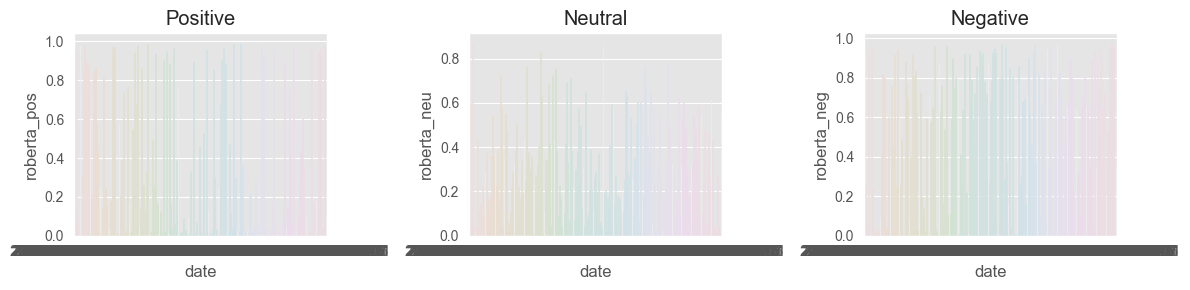

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=robertaTitleDF, x='date', y='roberta_pos', ax=axs[0])
sns.barplot(data=robertaTitleDF, x='date', y='roberta_neu', ax=axs[1])
sns.barplot(data=robertaTitleDF, x='date', y='roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [14]:
robertaContentDF = pd.DataFrame(robertaContent).T
robertaContentDF = robertaContentDF.reset_index().rename(columns={'index': 'ID'})
robertaContentDF = robertaContentDF.merge(df, on='ID', how='left')
robertaContentDF.columns

Index(['ID', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'subReddit', 'Title',
       'Content', 'Top Comment', 'upvotes', 'Number of comments', 'date',
       'uniquePostID'],
      dtype='object')

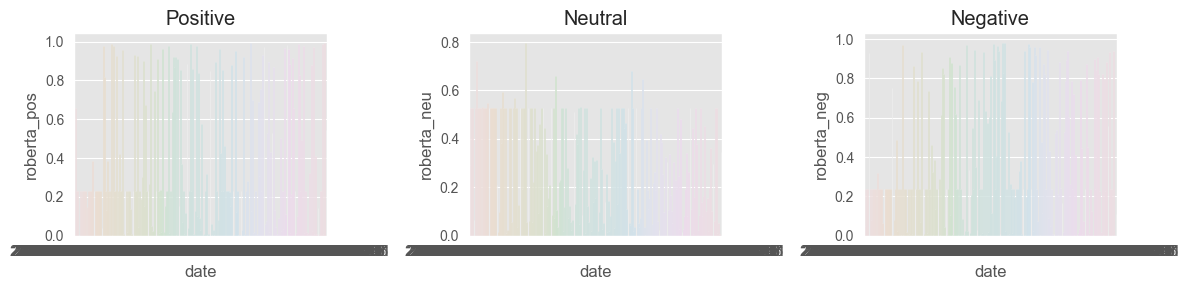

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=robertaContentDF, x='date', y='roberta_pos', ax=axs[0])
sns.barplot(data=robertaContentDF, x='date', y='roberta_neu', ax=axs[1])
sns.barplot(data=robertaContentDF, x='date', y='roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [16]:
results_title_df = pd.DataFrame(resTitle).T
results_title_df = results_title_df.reset_index().rename(columns={'index': 'ID'})
results_title_df = results_title_df.merge(df, on='ID', how='left')
results_title_df.columns

Index(['ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'subReddit', 'Title',
       'Content', 'Top Comment', 'upvotes', 'Number of comments', 'date',
       'uniquePostID'],
      dtype='object')

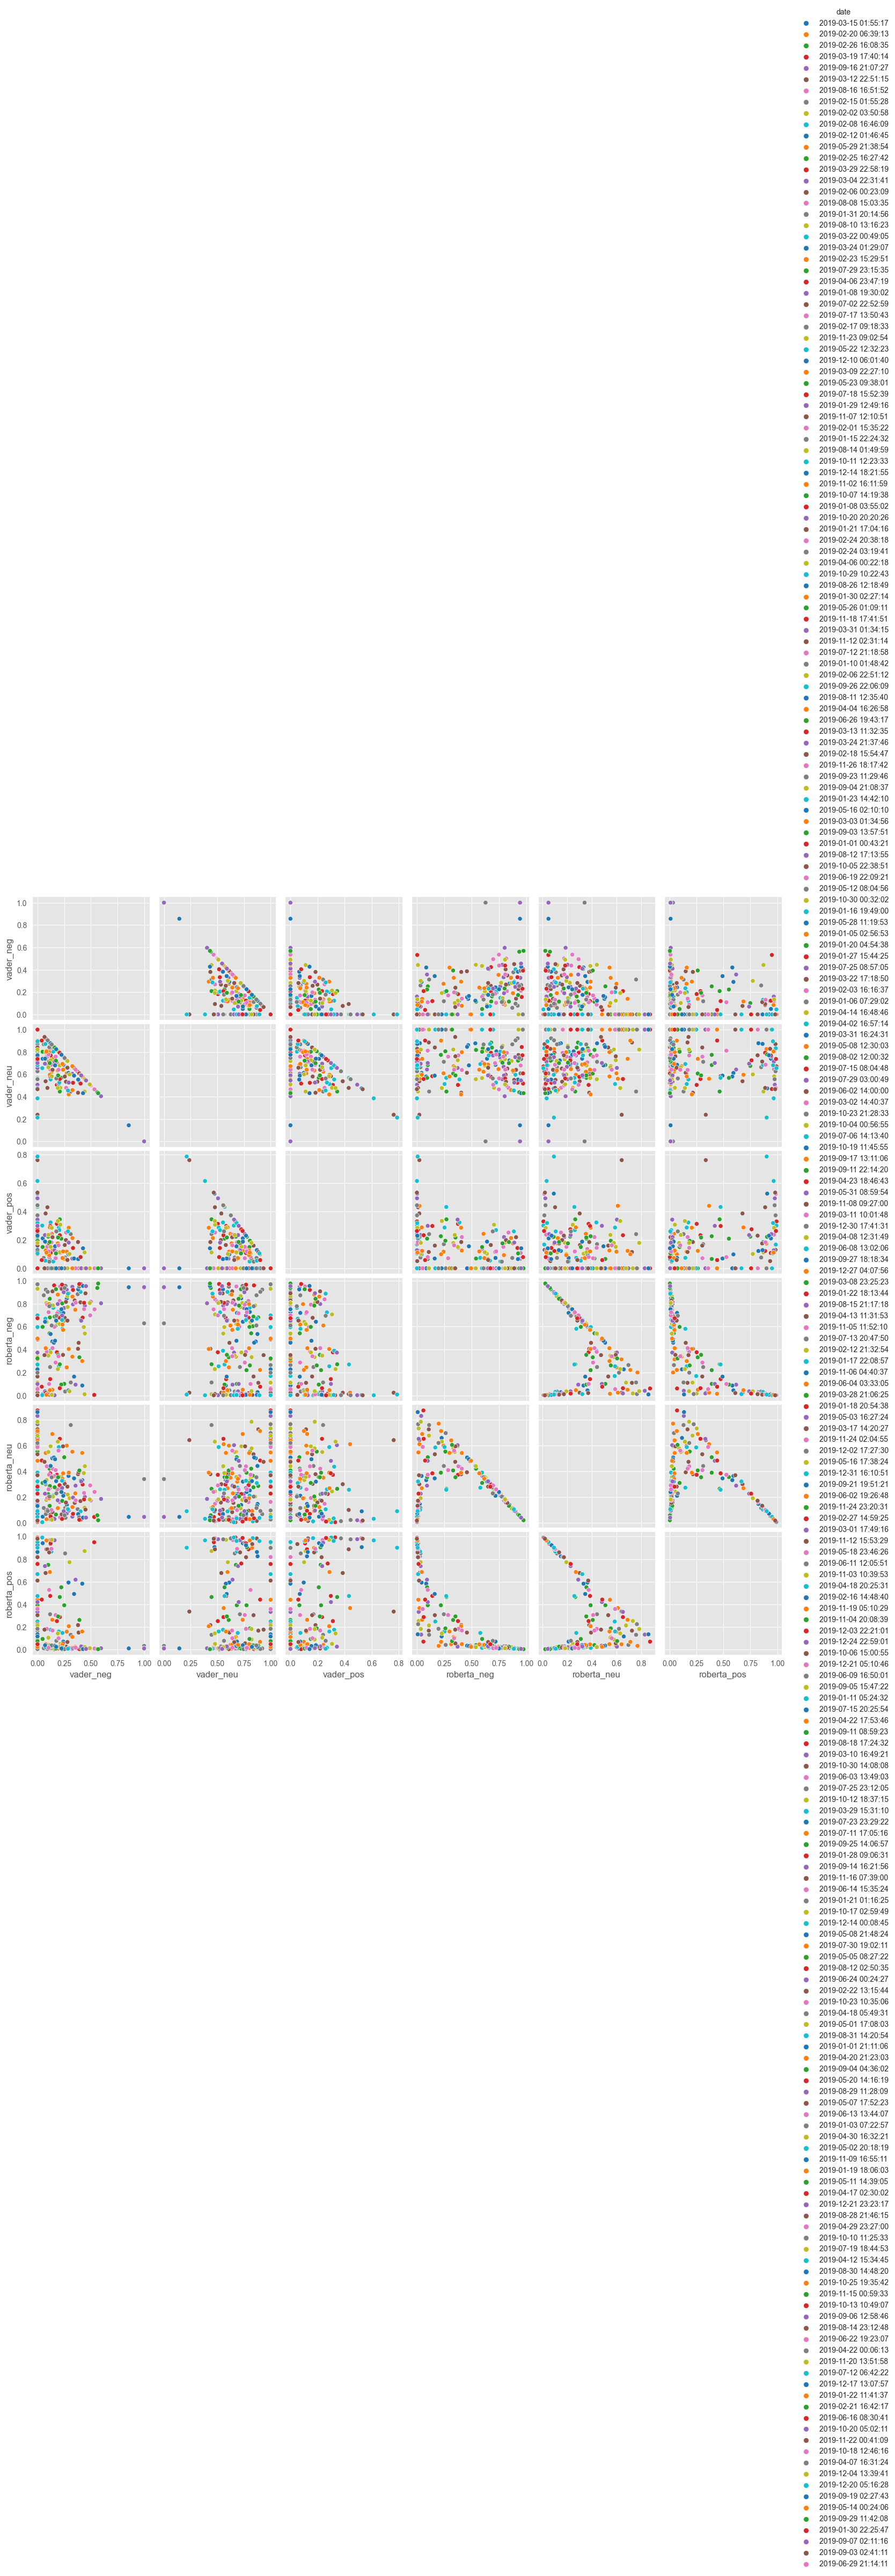

In [17]:
sns.pairplot(data=results_title_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='date',
            palette='tab10')
plt.show()

In [18]:
results_content_df = pd.DataFrame(resContent).T
results_content_df = results_content_df.reset_index().rename(columns={'index': 'ID'})
results_content_df = results_content_df.merge(df, on='ID', how='left')
results_content_df.columns

Index(['ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'subReddit', 'Title',
       'Content', 'Top Comment', 'upvotes', 'Number of comments', 'date',
       'uniquePostID'],
      dtype='object')

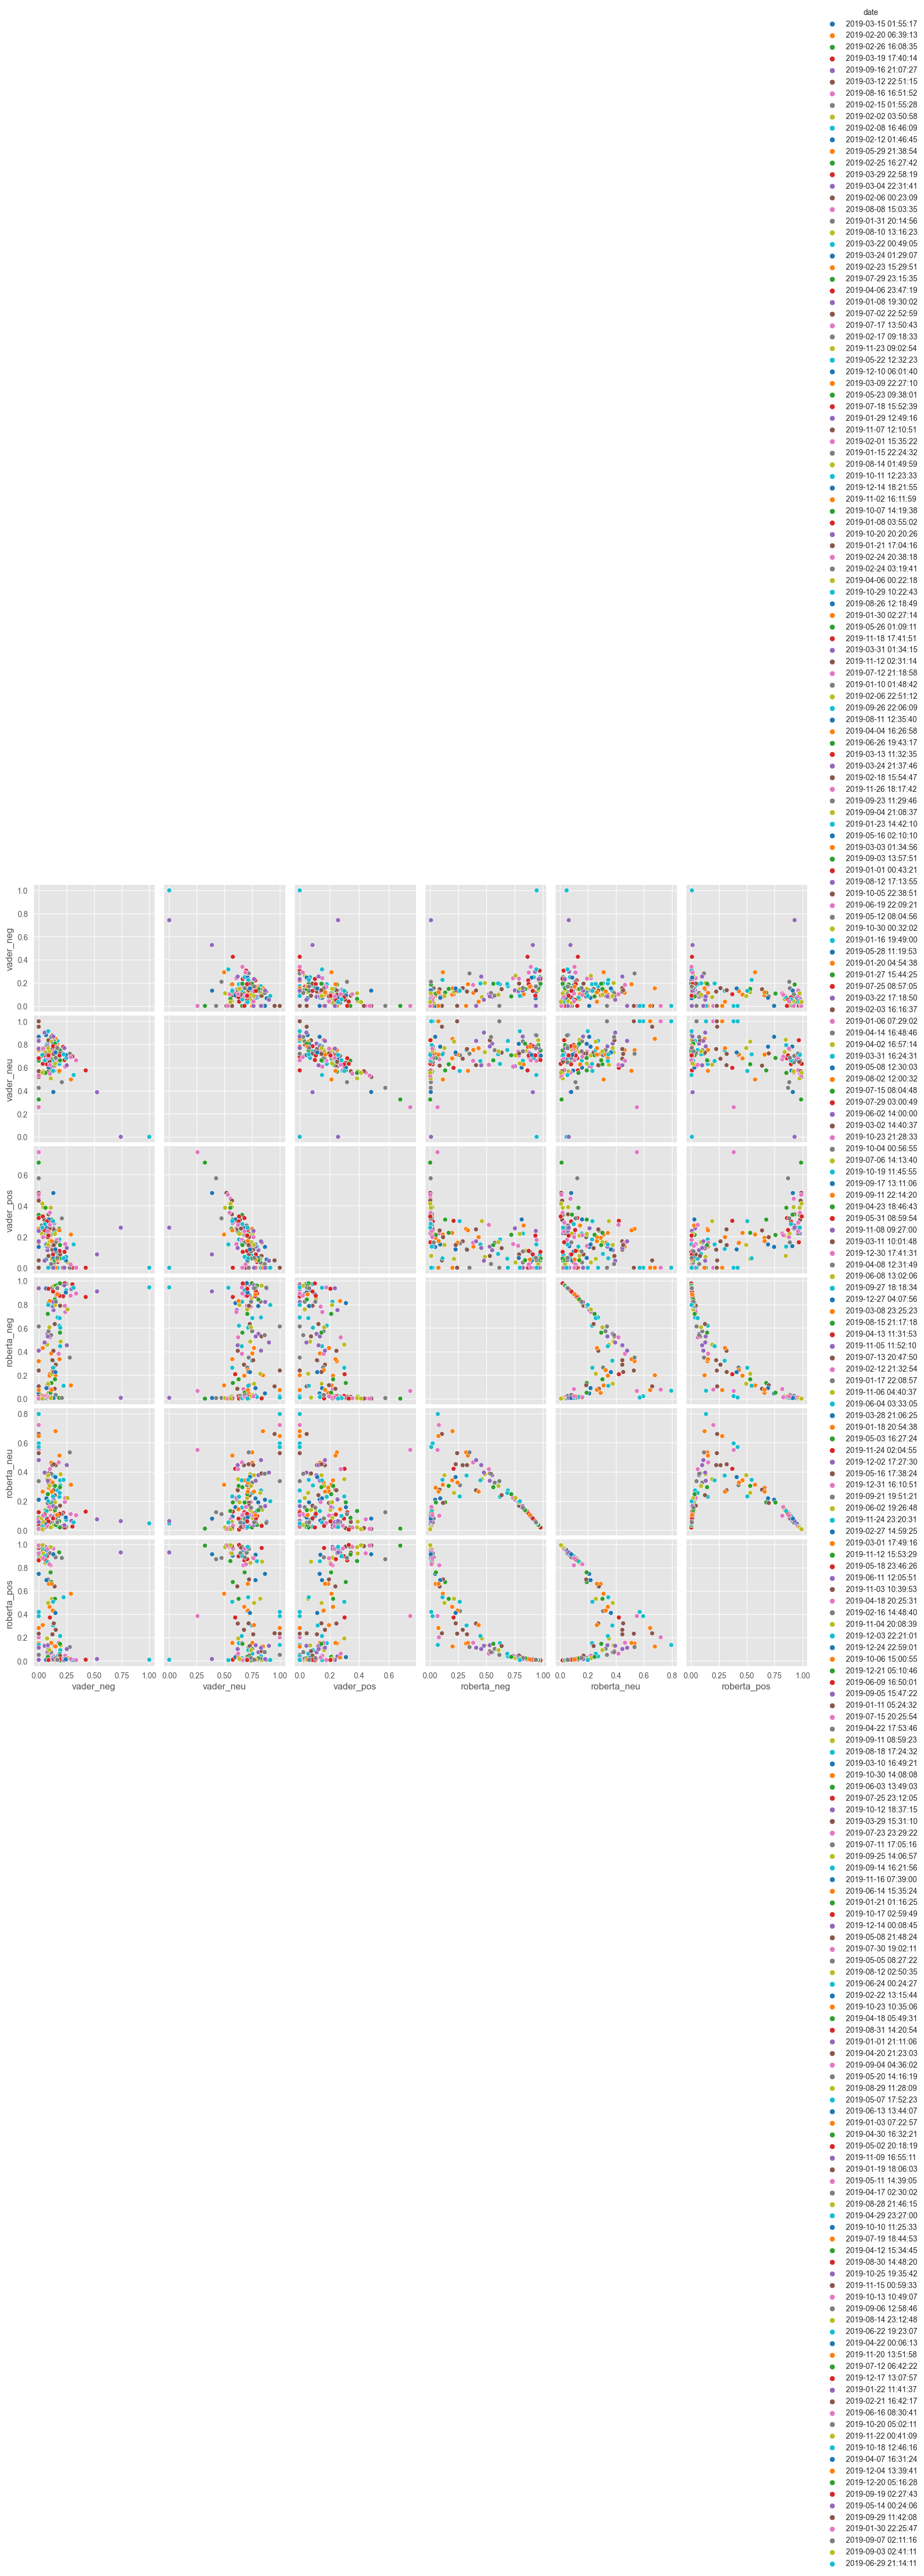

In [19]:
sns.pairplot(data=results_content_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='date',
            palette='tab10')
plt.show()